# Session 2 Recap

*Joachim Kahr Rasmussen*

## Recap (I/II) 

Git is popular for file sharing and collaborative coding
- **Track changes** system for files (log of all changes is kept)
- **Share the files** you want, how you want (you can 'copy' repositories)

Markdown is an easy and flexible alternative to LaTeX for building slides:
- **Coding** is easy and fast!
- Works well with **Jupyter**

## Recap (II/II) 

With Python, we can easily work with **text as data**:
- We can **manipulate strings** in very flexible ways (e.g. 'join', 'replace' and 'split')
- Strings and lists work much the same ways ('slice', 'concatenation' and '')

With Python, we can also easily **interact with the web**:
- When we are lucky, data comes in the form of **APIs** which are easy to fetch
- When we are not that lucky, one may need to navigate with **html** (future sessions)

We can **save text data** in various ways:
- Easy to save files as simple **txt-files**
- **JSON** is a popular file format well suited for storing dictionaries and lists of data

## Questions?

<center><img src='https://media.giphy.com/media/KazBpnNZghUmPl8XXJ/source.gif' alt="Drawing" style="width: 400px;"/></center>

# Session 3: Intro to visualization

*Joachim Kahr Rasmussen*

## Overview of Session

Today, we will work with how one can do plotting in Python. In particular, we will cover:
1. G
    - dsa

# Agenda

1. [Background on plotting](#Understanding-plotting)
2. The [Python toolbox for plotting](#Python-plotting)
3. [Plots for one variable](#Plot-one-variable) (Series)
4. Plots for two or more variables (DataFrame):         
    - [numeric](#Plots-of-two-numeric-variables)  data
    - [mixed numeric and categorical](#Plots-with-mixed-variables) data
5. [Advanced exploratory plotting](#Advanced-exploratory-plotting)  

## Associated Readings

Wickham (2010), sections 1-3
- Fundamentals of a plotting
- "Grammar of Graphics"

PDA, chapter 9:
- Basic syntax and fundamental concepts with matplotlib
- Combining matplotlib with pandas and using seaborn package

Moffitt (2017):
- Strengths and weaknesses of matplotlib
- Intro to `figure` and `axes`
- Using functions in order to improve formatting

# Loading stuff

In [1]:
# Loading libraries
import numpy as np
import pandas as pd # For data structuring
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # Add-on toolkit for plt

In [2]:
# Loading data
tips = sns.load_dataset('tips')
tb = tips['total_bill']

# Understanding Plotting

<img src="https://github.com/joachimkrasmussen/ISDS/blob/master/session_3/matplotlib-anatomy.png?raw=true" alt="drawing" width="600"/>

## Why We Plot

An English adage
> A picture is worth a thousand words

Is that always the case?


## What Values Do A,B,C and D Have?
<center><img src='https://raw.githubusercontent.com/abjer/sds2017/master/slides/figures/excel1.png'></center>

## The Shocking Answer
<center><img src='https://raw.githubusercontent.com/abjer/sds2017/master/slides/figures/excel2.png'></center>


## Is Plotting Always a Good Idea?


Suppose we have data on gender. We could make the pie chart, should we?

<AxesSubplot:xlabel='sex', ylabel='count'>

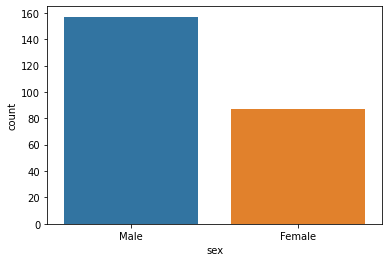

In [3]:
sns.countplot(x='sex', data=tips)

## Why Are You Plotting?
*Who's the audience?*

You / your team:

- **Exploratory** plots: Figures for understanding data
    - Quick to produce $\sim$ minimal polishing
    - Interesting feature may by implied by the producer
    - Be careful showing these out of context

Others:

- **Explanatory** plots: Figures to convey a message
    - Polished figures
    - Direct attention to interesting feature in the data
    - Minimize risk of misunderstanding

## How Should You Plot?
*What are some tips for making **explanatory** plots in a report?*  ***<font color="red">(Exam relevant!)</font>***

- Clear narratives - should convey key point(s)
  - If you want to show difference between groups in data make sure it is easy to distinguish them.

- Self explanatory
  - Contain axis label, title, footnotes in text containing relevant information.

- Nice appereance 
  - Choose the right plot type.
  - Make sure font type, size, colors, line width.

- Keep simplicity.
  - Anything unnecessary should be removed, see [this post](https://www.darkhorseanalytics.com/blog/data-looks-better-naked/).

*Some practical advice on making **explanatory** plots?*

1. Try out a few plot types, using exploratory analysis - use what works.
1. Apply the *"layered grammer of graphics"*.
    - Start with an empty canvas
    - Fill the necessary things (axis, ticks, bars/lines, labels)

## What Are You Plotting?
*What are some guidelines on making plots in **general**?*

Be aware of *what* you plot
- numerical vs. non-numeric (categorical)
- raw data vs. model results 

# Python Plotting 

## How Are You Plotting?
There are two overall approaches to plotting:

- make a fast, decent figure
    - iteratively adjust if necessary
    - start out in `seaborn` continue to `matplotlib`


- from empty canvas to figure
    - iteratively add material and layers
    - performed in `matplotlib`
   

## Packages for Python Plotting (I/II)
*What is the fundamental tool for making plots in Python?*

**Matplotlib** is the fundamental plotting module
- Can make almost any 2d plot.
- Can build publication ready figures.
- Caveat: 
    - requires time consuming customization;
    - requires practice.

In [4]:
import matplotlib.pyplot as plt
# allow printing in notebook
%matplotlib inline 

## Packages for Python Plotting (II/II)
*What are good tools for fast, exploratory plots?*

`seaborn` has built-in capabilities to make plots
- Analyzing data, e.g. splitting by subsets
- Make interpolation of data to smooth out noise.

`pandas` can easily convert Series and DataFrames to plots

# Plotting One Variable

## Matplotlib and the Grammar of Graphics (I/VII)
*Where do I start with making a plot?*

One thing to consider is the plotting style. Usually, however, you will not set this explicitly. 

There are lots of styles...

In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'bright',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'light',
 'muted',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'scatter',
 'science',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'vibrant']

## Matplotlib and the Grammar of Graphics (II/VIII)
*OK, but where do I then really start when making a plot?*

Recommend `ggplot` as style which is also typically the default.

We will begin with the fundamental and flexible way. We start with our plotting canvas.

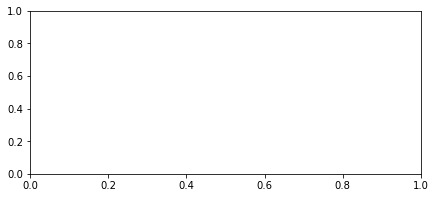

In [5]:
fig, ax = plt.subplots(figsize = (7, 3)) # create placeholder for plot

- `ax` contains most of the chart content as objects: 
    -  grid axes, labels, shapes we draw etc.
- `fig` the actual plot which is displayed (export to pdf etc.)

## Matplotlib and the Grammar of Graphics (II/VII)
*Can we change matplotlib defaults?*

Yes, this may be very useful. For instance plot size. Recommend `ggplot` as style.

In [7]:
plt.style.use('default') # set style (colors, background, size, gridlines etc.) # ggplot
plt.rcParams['figure.figsize'] = 10, 3 # set default size of plots
plt.rcParams.update({'font.size': 18}) # set default font size in plots

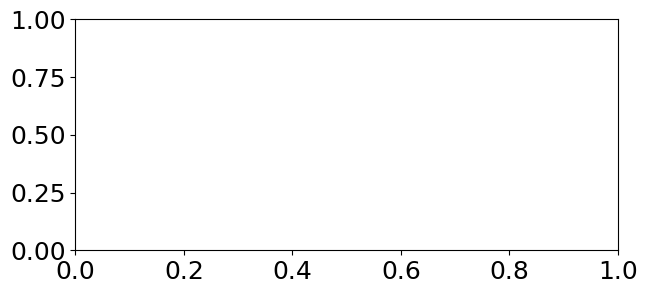

In [8]:
fig, ax = plt.subplots(figsize = (7, 3)) # recreate placeholder for plot

## Matplotlib and the Grammar of Graphics (III/VII)
We can modify our canvas, e.g the axis scaling:

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_xlim([0, 60]), ax.set_ylim([0,.06]) # add axes cutoffs 

## Matplotlib and the Grammar of Graphics (IV/VII)
We can draw plots on the canvas

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_xlim([0, 60]), ax.set_ylim([0,.06])
sns.distplot(tb,hist=False) # make plot

## Matplotlib and the Grammar of Graphics (V/VII)
Add labels for x-axis and y-axis

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_xlim([0, 60]), ax.set_ylim([0,.06])
sns.distplot(tb,hist=False) 
ax.set_xlabel('Total bill ($)'), ax.set_ylabel('Frequency') # add axis labels

## Matplotlib and the Grammar of Graphics (VI/VII)
Add labels for x-axis and y-axis

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_xlim([0, 60]), ax.set_ylim([0,.06])
sns.distplot(tb,hist=False) 
sns.distplot(tb,hist=True, bins=10) 
ax.set_xlabel('Total bill ($)'), ax.set_ylabel('Frequency')
sns.despine(ax=ax)

## Matplotlib and the Grammar of Graphics (VII/VII)
What might we change about our plot?
- Thickness?
- Color? 
- Showing raw data? 
- Make KDE plot by subgroups? (exercise)

# Plots with mixed variables

## Table format

*How did we define a tidy/long table?*

One row for each observation

<center><img src='https://raw.githubusercontent.com/abjer/sds2017/master/slides/figures/tidy.png'></center>

## Mixed types - numeric, categorical 

*How might we use categorical variables?*


- We can split data and make plots based on subsets of data!

Can we say anything about smokers tipping behavior?

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.plot(np.random.randn(50).cumsum(), 'k--')
ax3.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

# Plot type catalogue here: https://matplotlib.org/


In [ ]:
fig, axes = plt.subplots(2, 3, sharex=True)

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        plt.subplots_adjust(wspace=0, hspace=0)

In [ ]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

In [ ]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [ ]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

#ax.set_title('My first matplotlib plot')
#ax.set_xlabel('Stages')

props = {
'title': 'My first matplotlib plot',
'xlabel': 'Stages'
}
ax.set(**props)

In [ ]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='_nolegend_')
ax.legend(loc='best')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

plt.savefig('figpath.png', transparent=False, dpi=400, bbox_inches='tight')

In [ ]:
# Changing default parameters when plotting:

plt.rc('figure', figsize=(10, 10))

font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 12}

plt.rc('font', **font_options)

In [ ]:
s = pd.Series(np.random.randn(100).cumsum(), index=np.arange(0, 1000, 10))
#s.plot(use_index=False)
s.plot(xlim=(0,500))

In [ ]:
df = pd.DataFrame(np.random.randn(100, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 1000, 10))
df.plot()

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [ ]:
df = pd.DataFrame(np.round(np.random.rand(6, 4),0), 
                  index=['one', 'two', 'three', 'four', 'five', 'six'], 
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

print(df)

df.plot.barh()
df.plot.barh(stacked=True, alpha=0.5)

In [ ]:
df.value_counts().plot.bar()

In [ ]:
import seaborn as sns

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(20, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
print(df.head())
df.count()

In [ ]:
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)
top_10

In [ ]:
plt.style.use('ggplot')

In [ ]:
top_10.plot(kind='barh', y="Sales", x="Name")

In [ ]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)

In [ ]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer')

In [ ]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue')
#ax.legend().set_visible(False)
ax.legend(loc='best')

In [ ]:
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

In [ ]:
# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the averaged
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate the new customers
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer")

# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False)

In [ ]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)